In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

%matplotlib inline

In [21]:
df_prices = pd.read_csv('../data/S&P500_Sectors.csv', index_col=0, parse_dates=True)
df_returns = (df_prices.apply(np.log).diff().apply(np.exp) - 1).ix[1:]
df_returns

,energy,materials,industrial,cons_discretionary,cons_staple,healthcare,financials,it,telecom,utilities,real_estate
Date,,,,,,,,,,,
2001-10-10,0.035122,0.025355,0.025932,0.031142,0.011182,0.016583,0.017174,0.035833,0.009152,0.016819,-0.008100
2001-10-11,-0.004094,0.032506,0.024393,0.034442,-0.008294,-0.009409,0.012754,0.056219,-0.015805,0.003967,0.005545
2001-10-12,0.000502,-0.005948,-0.007965,-0.012844,-0.011894,0.003226,-0.014483,0.008196,-0.012502,-0.003344,-0.002607
2001-10-15,-0.020998,-0.007579,0.000455,-0.000277,-0.003762,0.011063,0.008580,-0.010797,-0.009659,-0.009821,0.005227
2001-10-16,0.009185,0.009164,0.000000,0.005585,-0.001935,0.001043,0.015204,0.018288,-0.015318,0.020329,-0.016300
2001-10-17,-0.006145,-0.016568,-0.025978,-0.031990,-0.006148,-0.005669,-0.008082,-0.044724,-0.009961,-0.009419,-0.011487
2001-10-18,-0.030682,-0.006399,-0.002378,-0.009672,0.006043,-0.006187,-0.009796,0.001403,-0.016505,-0.030840,-0.004731
2001-10-19,0.004700,-0.005462,0.000426,0.014459,0.014284,0.004810,-0.011617,0.013972,-0.001897,0.014527,-0.025832
2001-10-22,0.014177,0.026148,0.012894,0.008165,0.010445,0.019482,0.026263,0.026639,-0.017908,-0.012398,-0.025880


In [22]:
df_std=pd.rolling_std(df_returns, window=20) # monthly rolling volatility
df_std=df_std*np.sqrt(252)
df_returns=df_std.dropna()

,energy,materials,industrial,cons_discretionary,cons_staple,healthcare,financials,it,telecom,utilities,real_estate
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,0.233850,0.216684,0.184352,0.185505,0.122993,0.153202,0.239799,0.209184,0.186125,0.165484,0.244029
std,0.139057,0.124300,0.108537,0.114256,0.067616,0.084783,0.215249,0.120596,0.116808,0.102043,0.230986
min,0.062044,0.053314,0.047127,0.054583,0.044257,0.050624,0.054656,0.047564,0.052695,0.050359,0.043235
25%,0.155442,0.141019,0.114157,0.112693,0.083516,0.104269,0.121335,0.128768,0.119277,0.108122,0.131743
50%,0.204543,0.182727,0.150021,0.151230,0.106027,0.134175,0.169725,0.174354,0.148337,0.141214,0.166800
75%,0.267367,0.251133,0.219269,0.217832,0.140834,0.172792,0.264677,0.241927,0.200440,0.187340,0.255566
max,1.367336,1.071446,0.782230,0.894728,0.672399,0.761564,1.358485,0.838750,0.992632,0.949220,1.709980


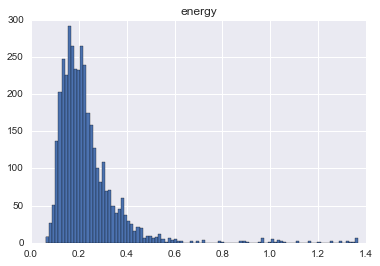

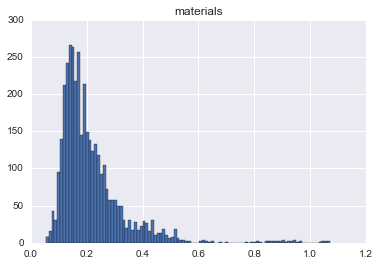

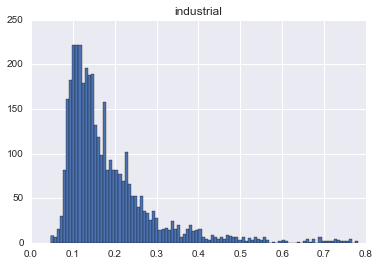

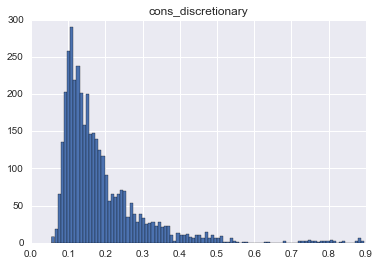

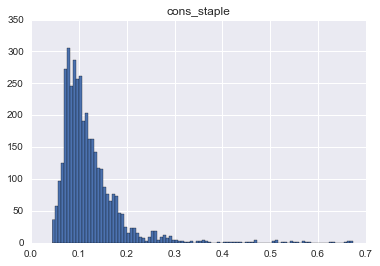

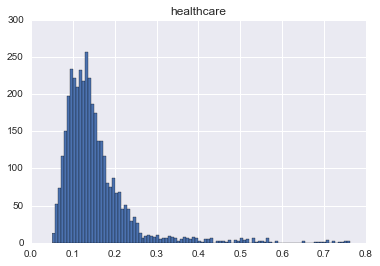

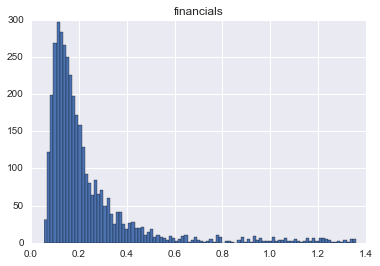

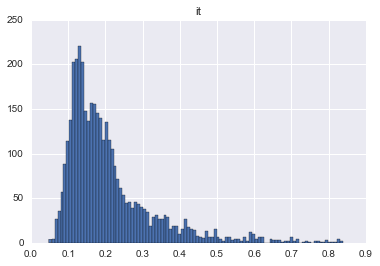

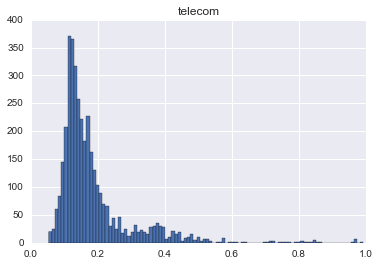

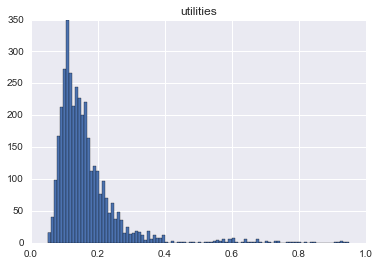

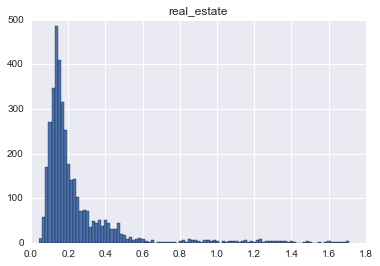

In [23]:
for c in df_returns.columns:
    fig = plt.figure()
    df_returns[c].hist(bins=100)
    plt.title(c)
    
df_returns.describe()

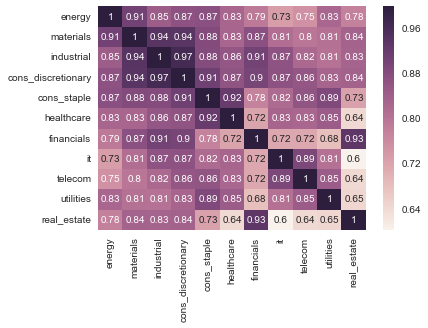

In [24]:
sns.heatmap(df_returns.corr(), annot=True)

# regimes for daily returns
Each red line shows the transition from one state to another. Other than a few sectors, this level of return data seems not to be robust enough, as the states oscillates too much even in the event of real high volatility regimes. However, it is interesting that the two states that we find are always positive mean with smaller variance, and negative mean with larger variance

In [25]:
def moving_median_state(ts, window_size):
    result = list();
    for i in range(len(ts)-window_size):
        median=np.median(ts[i:i+window_size])
        if np.abs(median-0.5)<0.001:
            result.append(0**result[max(0,i-1)]) #if first moving median is 0.5 then return 0 - this is arbitraty
            continue    
        else: result.append(median)
    return result

energy :  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

,sector,state1,state2
0,energy,"N(1.80e-01,2.15e-03)","N(3.96e-01,3.58e-02)"
1,materials,"N(1.58e-01,1.49e-03)","N(3.48e-01,2.16e-02)"
2,industrial,"N(1.26e-01,8.86e-04)","N(2.91e-01,1.42e-02)"
3,cons_discretionary,"N(1.29e-01,1.02e-03)","N(3.07e-01,1.72e-02)"
4,cons_staple,"N(9.49e-02,4.90e-04)","N(1.98e-01,7.74e-03)"
5,healthcare,"N(1.21e-01,9.30e-04)","N(2.66e-01,1.30e-02)"
6,financials,"N(1.44e-01,1.91e-03)","N(4.71e-01,7.82e-02)"
7,it,"N(3.52e-01,1.63e-02)","N(1.49e-01,1.57e-03)"
8,telecom,"N(3.44e-01,2.09e-02)","N(1.36e-01,1.03e-03)"
9,utilities,"N(2.90e-01,1.97e-02)","N(1.26e-01,1.06e-03)"


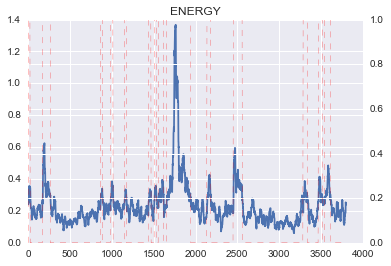

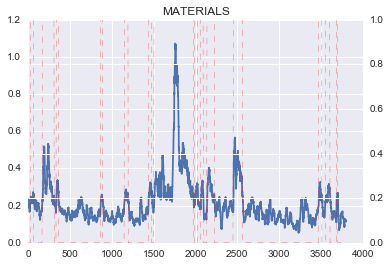

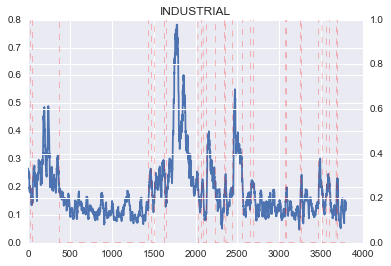

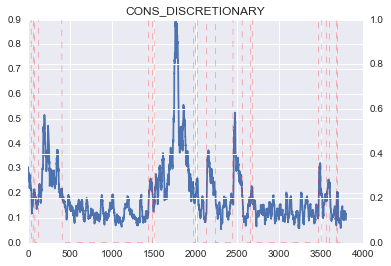

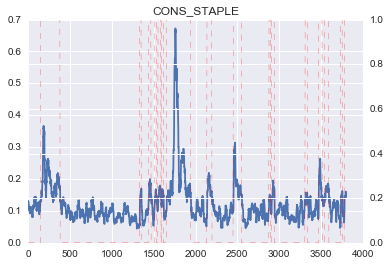

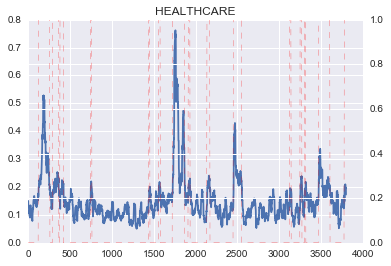

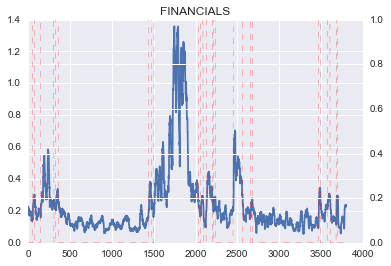

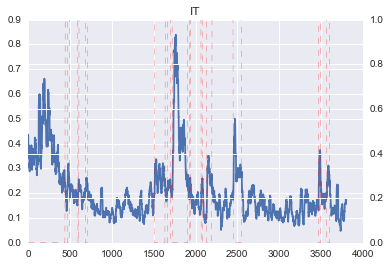

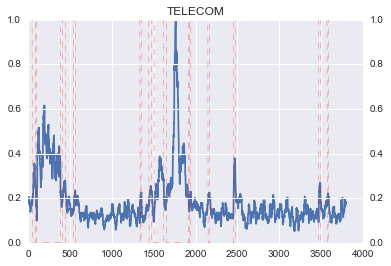

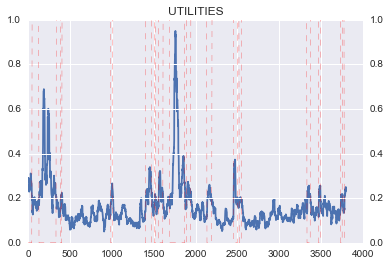

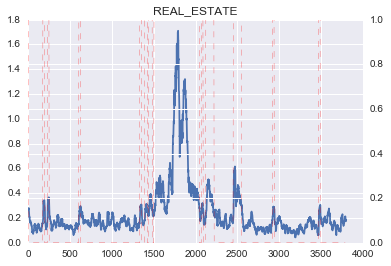

In [26]:
def hmm_df(dataframe):
    summary_df = pd.DataFrame([], columns=['sector', 'state1', 'state2'])
    for c in dataframe.columns:
        series = dataframe[c].values.reshape(-1,1)
        model = GaussianHMM(n_components=2)
        model.fit(series)
        states = model.predict(series)

        summary_df = summary_df.append(pd.DataFrame([[c, 
                                        'N({:.2e},{:.2e})'.format(model.means_[0][0], model.covars_[0][0][0]),
                                        'N({:.2e},{:.2e})'.format(model.means_[1][0], model.covars_[1][0][0])]]
                                       , columns=['sector', 'state1', 'state2']),
                                      ignore_index=True)
        rolling_window=10 # days
        states=moving_median_state(states, rolling_window)
        
        fig, ax1 = plt.subplots()
        ax1.plot(series)
        ax2 = ax1.twinx()
        ax2.plot(states, 'r--', linewidth=0.25)
        plt.title(c.upper())
        plt.savefig(c+'.png')
        print c, ": ", states
        print "\n series:", series
        
    return(summary_df)

hmm_df(df_returns)

# create weekly returns and do the same analysis
We see much fewer transitions

In [27]:
def make_return(series):
    return((series + 1).prod())
pd.options.display.max_rows = 999
df_weekly = (df_returns.groupby([df_returns.index.map(lambda x: x.year), df_returns.index.map(lambda x: x.isocalendar()[1])])\
    .aggregate(make_return) - 1).ix[1:] # extraneous first row removed
df_weekly

energy  materials  industrial  cons_discretionary  cons_staple  \
2001 45   1.482394   1.156642    1.452292            1.714909     0.611246   
     46   2.643584   1.514331    1.948444            2.189750     0.735164   
     47   2.299091   1.028012    1.354676            1.589218     0.485075   
     48   3.289774   1.295807    1.511096            1.913147     0.655206   
     49   3.297269   1.399191    1.444693            1.918032     0.579546   
     50   2.986510   1.724725    1.371447            2.157549     0.597452   
     51   1.920857   1.914737    1.394187            1.819383     0.674969   
     52   1.200714   1.404822    0.914444            1.180753     0.461297   
2002 1    1.411549   1.819668    1.116791            1.574251     0.746940   
     2    1.084624   1.732215    0.982007            0.879049     0.566854   
     3    1.140022   1.816176    1.053643            0.911974     0.518855   
     4    0.959449   1.297288    0.746148            0.728795     0.371935   
     5    1.506261   2.187031    1.545183            1.145250     0.648310   
     6    1.760930   2.088001    2.141241            1.317516     0.692540   
     7    1.632265   1.859228    2.205211            1.449845     0.696188   
     8    1.049613   1.261017    1.555977            1.142939     0.610104   
     9    1.406513   1.434320    2.021989            1.537653     0.864033   
     10   1.194305   1.718671    1.692102            1.477975     0.875985   
     11   1.128409   1.628707    1.721359            1.318577     0.913412   
     12   1.102692   1.518279    1.707683            1.130682     0.883936   
     13   0.785734   1.223047    1.258190            0.834552     0.557603   
     14   1.101281   1.375864    1.244112            0.965759     0.637733   
     15   1.273426   1.324424    1.294147            1.011363     0.683030   
     16   1.659908   1.409733    1.911993            1.080292     0.782870   
     17   1.682128   1.483121    1.810693            1.075304     0.762238   
     18   1.621441   1.572587    2.010771            1.145502     0.792689   
     19   1.813393   1.504207    2.311877            1.356426     0.728092   
     20   1.727245   1.356054    2.291079            1.730234     0.567294   
     21   1.726677   1.008410    2.432558            1.848955     0.621191   
     22   1.254785   0.639641    1.606638            1.264662     0.499531   
     23   1.559763   0.970516    2.246665            1.721218     0.774592   
     24   1.232190   1.001329    1.658461            1.295574     0.850796   
     25   1.333659   1.165842    1.686729            1.427470     0.905036   
     26   1.251612   1.202046    1.759281            1.601106     1.062353   
     27   0.900126   0.968228    1.268736            1.373505     0.766298   
     28   1.778665   1.657908    2.534496            2.588299     1.270621   
     29   2.266443   1.883116    2.632779            2.708078     1.586249   
     30   5.182691   3.577718    3.621724            3.775857     2.809144   
     31   7.912686   5.834271    5.410139            5.566531     3.694897   
     32   9.456262   6.776426    5.847138            5.831571     3.615443   
     33   9.768638   6.804884    5.971186            6.275108     3.100481   
     34   6.283260   4.877707    4.681474            5.562124     1.926601   
     35   4.471749   3.104792    3.324951            4.191762     1.390345   
     36   2.319846   1.663078    1.834836            2.409741     0.980236   
     37   2.829443   2.370594    2.281913            3.475280     1.102136   
     38   2.679429   2.271252    2.023389            2.641884     1.266561   
     39   2.896245   2.754279    2.202793            2.963908     1.564939   
     40   3.748591   4.005761    3.063499            3.515309     2.042532   
     41   3.783958   4.925255    3.831632            3.870922     2.138787   
     42   3.975437   7.082642    5.797871            5.571461     2.090570   
     43   3.665449   7.081224    6

energy :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

,sector,state1,state2
0,energy,"N(1.43e+00,3.93e-01)","N(8.06e+00,1.51e+02)"
1,materials,"N(1.22e+00,2.77e-01)","N(5.48e+00,3.41e+01)"
2,industrial,"N(9.05e-01,1.31e-01)","N(3.53e+00,7.83e+00)"
3,cons_discretionary,"N(3.70e+00,1.24e+01)","N(8.90e-01,1.21e-01)"
4,cons_staple,"N(6.06e-01,4.27e-02)","N(1.93e+00,3.05e+00)"
5,healthcare,"N(8.24e-01,9.87e-02)","N(3.31e+00,7.88e+00)"
6,financials,"N(1.05e+00,2.51e-01)","N(1.09e+01,2.12e+02)"
7,it,"N(1.02e+00,1.52e-01)","N(4.04e+00,9.34e+00)"
8,telecom,"N(9.06e-01,9.71e-02)","N(4.24e+00,1.74e+01)"
9,utilities,"N(9.02e-01,1.42e-01)","N(4.53e+00,2.22e+01)"


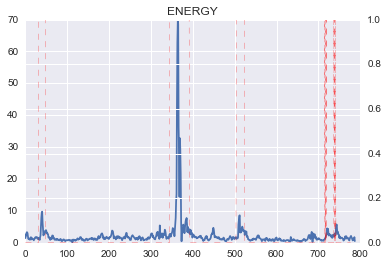

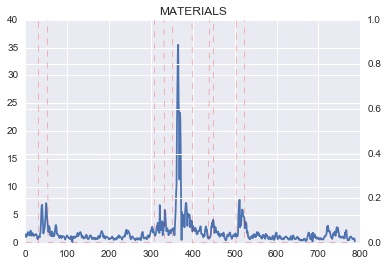

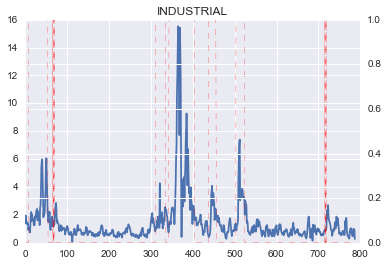

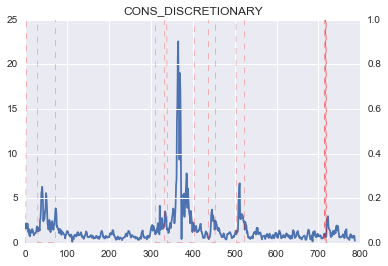

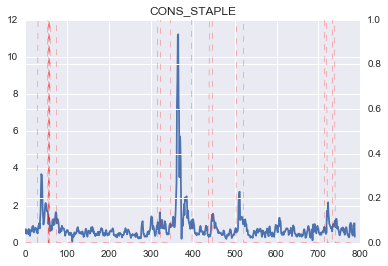

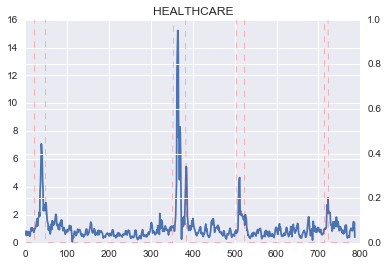

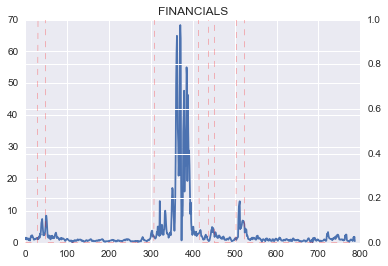

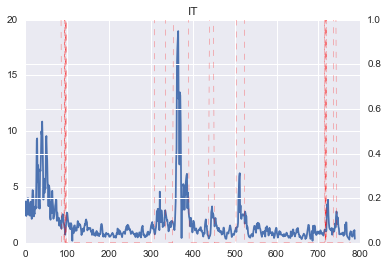

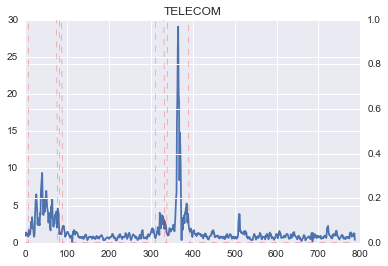

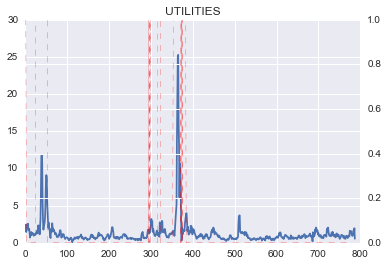

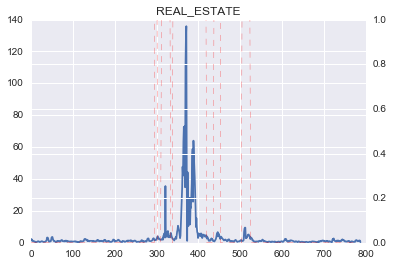

In [28]:
hmm_df(df_weekly)

In [11]:
df_weekly.index[100]

(2003, 37)

In [ ]:
bt.set_universe(current_spx, spx_events, quote_db)

README

Operations guide:

To initialize the database object run script.py: this creates quotes_db.db in data director for fast access and later use

To use the BackTester objects use the following syntax:

with BackTester() as bt:
    bt.set_universe(...)

BackTester object contains the list of securities in the portfolio, the universe and current date

Methods:
1. bt.set_universe(current_spx, spx_events, quote_db): this will read the list of companies currently in the SPX, and backtrack to the beginning of 2001

2. bt.step_day(): returns a Pandas dataframe with the next business day's data, and will automatically process any new events

3. bt.enter_position(ticker, price, amount): enter in a position on the current date--will return True if position is entered into correctly4. bt.exit_position(ticker, price): exits the position and returns (percent return, dollar return)

5. bt.get_current_fundamentals(ticker, delay): returns the most recent set of fundamentals for the ticker, with a delay measured in days